In [1]:
#Import libraries and read downloaded csv into a dataframe

import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

file_name = "heartattackdataprocessed.csv"
clean_df = pd.read_csv(f"data/{file_name}")

Organise data - we will keep all variables included for now

In [2]:
# Dependent variable data
y_data = clean_df['Result']

# Independent variables data - start with all options
X_data = clean_df[['Age','Gender','Heart rate','Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']] 

# Break the current dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, shuffle=True, train_size=0.7, random_state=10) 

# Check the class balance
y_train.value_counts(normalize=True)

1    0.604777
0    0.395223
Name: Result, dtype: float64

Based on this split, the algorithm will likely lean towards positive results due to the training set bias but not to such an extent that the model will be unsuitable. We will impute this class weight into our logistic regression model so that it can account for this sway before scaling the test and training sets for our variables. Without this scaling the algorithm will likely perform poorly as the data won't look standard and normally distributed. We can then fit this data to our weighted logistic model. 

## ***Analysis of adjusted class weights***

***Standard weighting (model 1)***

In [3]:
logistic_model1 = LogisticRegression(class_weight={False: 0.6, True: 0.4})
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
# Fit the model to the training dataset
logistic_model1.fit(X_train, y_train)

y_pred_prob_model1 = logistic_model1.predict_proba(X_test)[:, 1]
model1_auc = roc_auc_score(y_test, y_pred_prob_model1)
print('Model 1 AUC is:', model1_auc)

logistic_prediction1 = logistic_model1.predict(X_test)
cm = confusion_matrix(y_test, logistic_prediction1) 
report = classification_report(y_test, logistic_prediction1)
print(report)

# Evaluate the model's performance on the training set
y_train_pred = logistic_model1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model's performance on the test set
y_test_pred = logistic_model1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


y_pred_prob_model1 = logistic_model1.predict_proba(X_test)

Model 1 AUC is: 0.8862605135015494
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       144
           1       0.93      0.66      0.77       251

    accuracy                           0.75       395
   macro avg       0.77      0.79      0.75       395
weighted avg       0.81      0.75      0.76       395

Training Accuracy: 0.7828447339847991
Test Accuracy: 0.7518987341772152


Our model is very precise at for positive results but there is a very high recall for negative predictions or otherwise known as false negatives. In the context of this investigation involving a critical medical diagnosis, it is crucial to minimise false negatives, even at the cost of higher false positives. To account for this, we will begin by adjusting the weighting given to each class. First with balanced, and then with manual imputation if needed. This will train the model to place higher significance on these instances and develop better modelling for them. 

**Balanced class weighting (model 2)**

In [4]:
logistic_model2 = LogisticRegression(class_weight='balanced')
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
logistic_model2.fit(X_train, y_train)

y_pred_prob_model2 = logistic_model2.predict_proba(X_test)[:, 1]
model2_auc = roc_auc_score(y_test, y_pred_prob_model2)
print('Model 2 AUC is:', model2_auc)

logistic_prediction2 = logistic_model2.predict(X_test)
cm = confusion_matrix(y_test, logistic_prediction2) 
report = classification_report(y_test, logistic_prediction2)
print(report)

y_train_pred = logistic_model2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model2 = logistic_model2.predict_proba(X_test)

Model 2 AUC is: 0.8976316954404604
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       144
           1       0.96      0.67      0.79       251

    accuracy                           0.77       395
   macro avg       0.79      0.81      0.77       395
weighted avg       0.84      0.77      0.78       395

Training Accuracy: 0.7926167209554832
Test Accuracy: 0.7721518987341772


There was an improvement in recall and precision across the board which is good to see, however, there was only a 0.01 improvement in positive recall. This suggests however, that we may be on the right track. We will try reduce the weighting towards false.

**In favour of positive (model 3)**

In [5]:
logistic_model3 = LogisticRegression(class_weight={False: 0.5, True: 0.5})
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
logistic_model3.fit(X_train, y_train)

y_pred_prob_model3 = logistic_model3.predict_proba(X_test)[:, 1]
model3_auc = roc_auc_score(y_test, y_pred_prob_model3)
print('Model 3 AUC is:', model3_auc)

logistic_prediction3 = logistic_model3.predict(X_test)
cm = confusion_matrix(y_test, logistic_prediction3) 
report = classification_report(y_test, logistic_prediction3)
print(report)

y_train_pred = logistic_model3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model3.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model3 = logistic_model3.predict_proba(X_test)

Model 3 AUC is: 0.8852229969012838
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       144
           1       0.87      0.82      0.84       251

    accuracy                           0.81       395
   macro avg       0.79      0.80      0.80       395
weighted avg       0.81      0.81      0.81       395

Training Accuracy: 0.7937024972855592
Test Accuracy: 0.8075949367088607


These figures look much better, 80% is generally considered a high level of recall but in the context of this investigation we want to increase this even further.

**Further favour of positive (model 4)**

In [6]:
logistic_model4 = LogisticRegression(class_weight={False: 0.7, True: 1.0})
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
logistic_model4.fit(X_train, y_train)

y_pred_prob_model4 = logistic_model4.predict_proba(X_test)[:, 1]
model4_auc = roc_auc_score(y_test, y_pred_prob_model4)
print('Model 4 AUC is:', model4_auc)

logistic_prediction4 = logistic_model4.predict(X_test)
cm = confusion_matrix(y_test, logistic_prediction4) 
report = classification_report(y_test, logistic_prediction4)
print(report)

y_train_pred = logistic_model4.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model4.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model4 = logistic_model4.predict_proba(X_test)

Model 4 AUC is: 0.8922504426737494
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       144
           1       0.81      0.91      0.86       251

    accuracy                           0.81       395
   macro avg       0.80      0.77      0.78       395
weighted avg       0.80      0.81      0.80       395

Training Accuracy: 0.7937024972855592
Test Accuracy: 0.8050632911392405


We have seen a dramatic increase in positive recall to over 0.9 while maintaining a weighted average for precision, recall and f1-score over 0.8. At this stageAny further adjustments to the weighting would likely result in a lower than acceptable precision for positive results. Our negative recall is concerning and will require further model optimisation.

## ***Analysis of logistic regression parameter removal and optimised weighting (model 5)***

We will try changing the default L2 (Ridge regression) regularization penalty to "none" in an attempt to improve feature selection. L1 (lasso regression) regularization is not supported when using the default solver "lbfgs". We will implement this change because we earlier saw on our heat map, many attributes had individually weak correlations. L2 regularization reduces the impact of these attributes which may have a strong cumulative effect. We will reuse the previous logistic model code, keeping our previously found optimal class_weight and specifiying the penalty as "none". 

In [7]:
logistic_model5 = LogisticRegression(class_weight={False: 0.7, True: 1}, penalty="none")
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
logistic_model5.fit(X_train, y_train)

y_pred_prob_model5 = logistic_model5.predict_proba(X_test)[:, 1]
model5_auc = roc_auc_score(y_test, y_pred_prob_model5)
print('Model 5 AUC is:', model5_auc)

logistic_prediction5 = logistic_model5.predict(X_test) 
cm = confusion_matrix(y_test, logistic_prediction5) 
report = classification_report(y_test, logistic_prediction5)
print(report)

y_train_pred = logistic_model5.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model5.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model5 = logistic_model5.predict_proba(X_test)

Model 5 AUC is: 0.982113213811421
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       144
           1       0.96      0.94      0.95       251

    accuracy                           0.94       395
   macro avg       0.93      0.93      0.93       395
weighted avg       0.94      0.94      0.94       395

Training Accuracy: 0.9402823018458197
Test Accuracy: 0.9367088607594937


It looks like there is a high level of accuracy in the test and training sets suggesting that overfitting is not occuring and that regularization was limiting the model and causing underfitting. This may be due to the size of the dataset. Let's perform a final check using the same ROC and AUC doe as before but with the new logistic model.

## ***Tweaking of weighting after overall strengthening from regularisation removal (model 6)***

We are again reusing the code for generating our logistic regression model with no penalty and a slight adjustment in the False class_weight from 0.7 to 0.3 to give it less signficiance in an attempt to improve the selection and thus recall in True results. 

In [8]:
logistic_model6 = LogisticRegression(class_weight={False: 0.3, True: 1}, penalty="none")
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
logistic_model6.fit(X_train, y_train)

y_pred_prob_model6 = logistic_model6.predict_proba(X_test)[:, 1]
model6_auc = roc_auc_score(y_test, y_pred_prob_model6)
print('Model 6 AUC is:', model6_auc)

logistic_prediction6 = logistic_model6.predict(X_test) 
cm = confusion_matrix(y_test, logistic_prediction6) 
report = classification_report(y_test, logistic_prediction6)
print(report)

y_train_pred = logistic_model6.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model6.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model6 = logistic_model6.predict_proba(X_test)

Model 6 AUC is: 0.9844095838866755
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       144
           1       0.92      0.97      0.95       251

    accuracy                           0.93       395
   macro avg       0.94      0.92      0.92       395
weighted avg       0.93      0.93      0.93       395

Training Accuracy: 0.9348534201954397
Test Accuracy: 0.9316455696202531


Further adjusting the class_weight after changing our regularization parameter has allowed for further optimisation in regards to positive recall. A slight decrease in weighted averages has occured but all levels are still strong, still excellent AUC. There has also been a reduction in negative case recall to 0.86 so additional tweaking would push this level outside the acceptable range. A very high rate of positive recall satisfys the goal of this investigation which was to generate a model that minimised false negatives as much as possible. We will proceed with further optimisation attempts

## ***Analysis of logistic regression parameter L2 optimisation (GridSearchCV) and optimised weighting (model 7)***

It is worth considering optimising L2 rather than completely removing it. L2 is adjusted by its weighting parameter 'C'. GridSearchCV can be employed for this. 

In [9]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=10),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print(cv.best_params_)

{'C': 1000}


In [10]:
logistic_model7 = LogisticRegression(class_weight={False: 0.3, True: 1}, C=1000)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
logistic_model7.fit(X_train, y_train)

y_pred_prob_model7 = logistic_model7.predict_proba(X_test)[:, 1]
model7_auc = roc_auc_score(y_test, y_pred_prob_model7)
print('Model 7 AUC is:', model7_auc)

logistic_prediction7 = logistic_model7.predict(X_test) 
cm = confusion_matrix(y_test, logistic_prediction7) 
report = classification_report(y_test, logistic_prediction7)
print(report)

y_train_pred = logistic_model7.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model7.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model7 = logistic_model7.predict_proba(X_test)

Model 7 AUC is: 0.9760402833111995
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       144
           1       0.90      0.97      0.93       251

    accuracy                           0.91       395
   macro avg       0.92      0.89      0.90       395
weighted avg       0.91      0.91      0.91       395

Training Accuracy: 0.9142236699239956
Test Accuracy: 0.9088607594936708


Attempting to optimise rather than remove the regularisation penalty has resulted in a worse report so we can be confident in our decision. Let's investigate feature selection

## ***Finding optimal parameters with feature selection - Recursive Feature Elimination (RVE) (model 8)***

We have already found our optimal parameters for weighting and logistic regression regularisation, lets investigate the X categories provided

In [11]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=10), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 8
Number of features after elimination 2


In [12]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [13]:
logistic_model8 = LogisticRegression(class_weight={False: 0.3, True: 1}, penalty="none")
scale = StandardScaler()
X_train = X_train_sel
X_test = X_test_sel
logistic_model8.fit(X_train, y_train)

y_pred_prob_model8 = logistic_model8.predict_proba(X_test)[:, 1]
model8_auc = roc_auc_score(y_test, y_pred_prob_model8)
print('Model 8 AUC is:', model8_auc)

logistic_prediction8 = logistic_model8.predict(X_test) 
cm = confusion_matrix(y_test, logistic_prediction8) 
report = classification_report(y_test, logistic_prediction8)
print(report)

y_train_pred = logistic_model8.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = logistic_model8.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

y_pred_prob_model8 = logistic_model8.predict_proba(X_test)

Model 8 AUC is: 0.9857376051350154
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       144
           1       0.91      0.97      0.94       251

    accuracy                           0.92       395
   macro avg       0.93      0.91      0.92       395
weighted avg       0.93      0.92      0.92       395

Training Accuracy: 0.9391965255157437
Test Accuracy: 0.9240506329113924


By cutting our features from 8 to 2, we have achieved our best AUC and maintained good scores in the report. Speed will have also increased however, our negative recall has been lowered as well as the test accuracy. We will retain the 8 features as speed is not a concern at this stage and more confidence is provided in having the additional features for the model. 

**Model 6 has ultimately performed best for our intended scope despite the slightly better accuracy seen in 8**

## ***Comparison of ROC***

ROC index on test for `model1`: 0.8862605135015494
ROC index on test for `model2`: 0.8976316954404604
ROC index on test for `model3`: 0.8852229969012838
ROC index on test for `model4`: 0.8922504426737494
ROC index on test for `model5`: 0.982113213811421
ROC index on test for `model6`: 0.9844095838866755
ROC index on test for `model7`: 0.9760402833111995
ROC index on test for `model8`: 0.9857376051350154


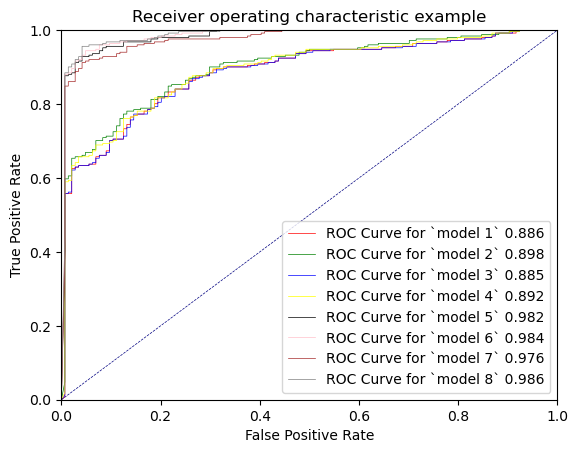

In [14]:
from sklearn.metrics import roc_auc_score

roc_index_model1 = roc_auc_score(y_test, y_pred_prob_model1[:, 1])
roc_index_model2 = roc_auc_score(y_test, y_pred_prob_model2[:, 1])
roc_index_model3 = roc_auc_score(y_test, y_pred_prob_model3[:, 1])
roc_index_model4 = roc_auc_score(y_test, y_pred_prob_model4[:, 1])
roc_index_model5 = roc_auc_score(y_test, y_pred_prob_model5[:, 1])
roc_index_model6 = roc_auc_score(y_test, y_pred_prob_model6[:, 1])
roc_index_model7 = roc_auc_score(y_test, y_pred_prob_model7[:, 1])
roc_index_model8 = roc_auc_score(y_test, y_pred_prob_model8[:, 1])


print("ROC index on test for `model1`:", roc_index_model1)
print("ROC index on test for `model2`:", roc_index_model2)
print("ROC index on test for `model3`:", roc_index_model3)
print("ROC index on test for `model4`:", roc_index_model4)
print("ROC index on test for `model5`:", roc_index_model5)
print("ROC index on test for `model6`:", roc_index_model6)
print("ROC index on test for `model7`:", roc_index_model7)
print("ROC index on test for `model8`:", roc_index_model8)


fpr_model1, tpr_model1, thresholds_model1 = roc_curve(y_test, y_pred_prob_model1[:,1])
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(y_test, y_pred_prob_model2[:,1])
fpr_model3, tpr_model3, thresholds_model3 = roc_curve(y_test, y_pred_prob_model3[:,1])
fpr_model4, tpr_model4, thresholds_model4 = roc_curve(y_test, y_pred_prob_model4[:,1])
fpr_model5, tpr_model5, thresholds_model5 = roc_curve(y_test, y_pred_prob_model5[:,1])
fpr_model6, tpr_model6, thresholds_model6 = roc_curve(y_test, y_pred_prob_model6[:,1])
fpr_model7, tpr_model7, thresholds_model7 = roc_curve(y_test, y_pred_prob_model7[:,1])
fpr_model8, tpr_model8, thresholds_model8 = roc_curve(y_test, y_pred_prob_model8[:,1])


import matplotlib.pyplot as plt

plt.plot(fpr_model1, tpr_model1, label='ROC Curve for `model 1` {:.3f}'.format(roc_index_model1), color='red', lw=0.5)
plt.plot(fpr_model2, tpr_model2, label='ROC Curve for `model 2` {:.3f}'.format(roc_index_model2), color='green', lw=0.5)
plt.plot(fpr_model3, tpr_model3, label='ROC Curve for `model 3` {:.3f}'.format(roc_index_model3), color='blue', lw=0.5)
plt.plot(fpr_model4, tpr_model4, label='ROC Curve for `model 4` {:.3f}'.format(roc_index_model4), color='yellow', lw=0.5)
plt.plot(fpr_model5, tpr_model5, label='ROC Curve for `model 5` {:.3f}'.format(roc_index_model5), color='black', lw=0.5)
plt.plot(fpr_model6, tpr_model6, label='ROC Curve for `model 6` {:.3f}'.format(roc_index_model6), color='pink', lw=0.5)
plt.plot(fpr_model7, tpr_model7, label='ROC Curve for `model 7` {:.3f}'.format(roc_index_model7), color='brown', lw=0.5)
plt.plot(fpr_model8, tpr_model8, label='ROC Curve for `model 8` {:.3f}'.format(roc_index_model8), color='grey', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ***Confusion matrix***

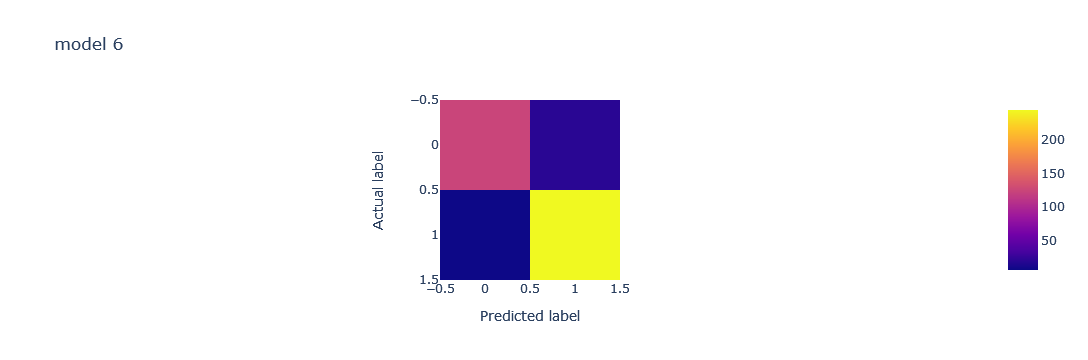

In [16]:
cm6 = confusion_matrix(y_test, logistic_prediction6)

cm_fig6 = px.imshow(cm6, labels={'x': 'Predicted label', 'y': 'Actual label'}, title="model 6")

cm_fig6.show()

## INSIGHTS

The goal of creating a machine learning model that can accurately predict a heart attack instance with minimisation of false negatives based on the dataset has been achieved but questions remain about its practical use. The context and ethical considerations of this task have been considered throughout the stages of analysis. First, the data itself raised problems regarding its quality and ethical characteristics. There is much we don’t know about the dataset, namely how and why it was collected and by who. Assumptions had to be made regarding patient consent, sampling and ethnic/regional considerations in the application of the data to an Australian context. For the purposes of this task a generalised model was implemented but it was demonstrated that proportional gender imbalances in the dataset could limit the practical application of the model generated. This raises ethical questions about achieving fairness at the cost of accuracy and vice versa. It is possible that the collectors purposely balanced the genders in collecting data in the goal of fairness, but in turn created a less accurate portrayal of heart attack instances in the male population. In the case of Troponin levels, which saw a mean increase of 40% in males, its weighting in predicting a heart attack would have been reduced due to a roughly equal number of females who have generally lower levels. Applying this model to a male population could therefore lead to a false negative despite elevated Troponin which was shown in the heat map to have a correlation. Additionally there was a slight bias towards positive results which may be reflective in an application of the model to patients presenting with heart-related complaints, but would be less suited for a general hospital application. 

The context in which a model such as this should be used is highly specific and may not be repeatable. Hospital practices vary between geographic regions and what may be a suitable model for Erbil in Iraq, may not be so relevant for an Australian hospital setting. This is not to say that the model does not provide value, just that the context must be heavily scrutinised. It would need to be employed as an additional tool for physicians to draw their attention to potential risk cases, not as a tool for sole determination of treatment access or physician care related to heart attacks. Pre-existing and technical bias could be an issue in the application of this algorithm. Only one model was implemented in this investigation and only with those 8 categories of data available. Further investigation would need to be performed with other datasets and variables that may encapsulate risk factors not considered by the data available here. 

For the purpose of this task, minimisation of false negatives was placed as the most important factor, which is suitable given the scenario of a high-risk medical diagnosis. However, what levels are deemed as acceptable for other aspects of the model is highly subjective. To generate a well-performing model, risks arise of ignoring the practical realities and limitations of the data. Care and testing were undertaken to ensure overfitting was not present and ultimately, a very well performing model for the data was generated, at least on paper. Precision of over 90% for both positive and negative results is theoretically excellent, as is a positive recall of 97%. This high positive recall was pursued at the cost of negative recall which ended up at 86%. Few fields highlight the human cost of these figures like the medical field, particularly in a context such as this. It is generally accepted that a higher rate of false positives is acceptable. Although the implications are significant, unnecessary tests and treatment is considered better than a false negative where a patient goes untreated which may ultimately be fatal. There is of course a discourse on the extent to which these are acceptable and pre-existing stakeholder bias may play a role as well such as in societies with privatised healthcare where there is an incentive to treat, even if it may not be entirely necessary. It is simple to say for example, that 80% is an acceptable baseline, but a 1% change in recall, when applied across a large population, could lead to tens of thousands of cases being incorrectly identified. Although the levels in this model are strong, the choice in adjusting model parameters to achieve ‘more desirable’ assessment levels can not be taken lightly. Although this investigation has produced a well-performing model, it has primarily served to highlight the importance and span of ethical considerations in machine learning models and in the broader field of data science. 